## Initialise, define functions

In [1]:
# import statements
%matplotlib inline
import numpy as np
import xarray as xr

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import cartopy
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
import pandas as pd
from datetime import datetime, timedelta
from rhwhitepackages3.plotting import *

import matplotlib.ticker as mticker
import matplotlib.cm as cm



In [2]:
# Create nice colorbars
cmap_def, cmap_wc, cmap_reds = get_colormaps()

In [3]:
def set_ax_overview(ax,longrids,latgrids,province=False):
    resol = '50m'
    provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
                name='admin_1_states_provinces_lines', scale=resol, facecolor='none', edgecolor='k')

    ax.set_extent([lon_extent[0], lon_extent[1], lat_extent[0], lat_extent[1]])
    if province:
        ax.add_feature(provinc_bodr, linestyle='-', linewidth=1.5, edgecolor="k", zorder=10)
    ax.add_feature(cfeature.BORDERS, linewidth=1.5)
    #ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.COASTLINE)
    #ax.add_feature(cfeature.OCEAN, color = 'lightblue')
    ax.set_aspect('auto')
    #gl = ax.gridlines(draw_labels = True, alpha=0.5)
    gl = ax.gridlines(draw_labels=True, x_inline=None, y_inline=False)
    gl.ylocator = matplotlib.ticker.FixedLocator(latgrids)
    gl.xlocator = matplotlib.ticker.FixedLocator(longrids)
    gl.xlabel_style = {'rotation': 0}
    gl.top_labels = None
    gl.right_labels = None

    return(ax)

def set_ax_synoptic(n):
    ax = fig.add_subplot(4, 1, n, projection=ccrs.PlateCarree(central_longitude=180))
    ax.set_extent([lon_extent[0], lon_extent[1], lat_extent[0], lat_extent[1]])
    #ax.add_feature(provinc_bodr, linestyle='-', linewidth=1.5, edgecolor="k", zorder=10)
    ax.add_feature(cfeature.BORDERS, linewidth=1.5)
    ax.add_feature(cfeature.COASTLINE,linewidth=3)
    gl = ax.gridlines(draw_labels = True, alpha=0.5)
    gl.top_labels = None
    gl.right_labels = None
    gl.xlocator = mticker.FixedLocator(np.arange(-180,180,20))
    gl.ylocator = mticker.FixedLocator(np.arange(35,75,10))

    gl.xlabel_style = {'size': 30, 'color': 'gray'}
    gl.ylabel_style = {'size': 30, 'color': 'gray'}
    return(ax)

In [4]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

In [5]:
# Define plotting function for synoptic plots
def plot_rh_mslp_u_v(ax,timesel):
    rh700_70_mask.sel(time = timesel).plot.contourf(ax=ax, cmap = 'lightblue',transform=ccrs.PlateCarree(), add_colorbar=False)
    rh700_90_mask.sel(time = timesel).plot.contourf(ax=ax, cmap = 'Blue', transform=ccrs.PlateCarree(), add_colorbar=False)

    mslp_plot = mslp_data.sel(time = timesel).msl.plot.contour(ax=ax, cmap = 'black', alpha = 1,levels = np.arange(956,1060,4),transform=ccrs.PlateCarree(),add_colorbar=False)
    ax.clabel(mslp_plot, inline=True, fontsize=25, fmt = '%.0f')

    vectorsel=12 # don't plot vectors at every point
    u = u_v_rh_data.sel(level=250,time=timesel).u[::vectorsel,::vectorsel]
    v = u_v_rh_data.sel(level=250,time=timesel).v[::vectorsel,::vectorsel]
    M = np.sqrt(u*u+v*v) # magnitude
    quplot = plt.quiver(u.longitude,u.latitude,u.values, v.values, M,cmap=cm.inferno_r,transform=ccrs.PlateCarree(),
              scale=1500, headwidth = 5, headaxislength = 3, headlength = 3,minlength=3)
    plt.clim(0,90)
    return(ax,quplot)

## Read in data

### Overview plots

In [6]:
# Read in ERA5
ERA5_daily_max2mT = xr.open_mfdataset('/data/rwhite/shared/ERA5/ERA5_*_temperature_daily_max_2m_1x1.nc')


In [7]:
# Set up heatwave dates and locations
date1 = {}
date2 = {}
date1_plot = {}
date2_plot = {}


lat1 = {}
lat2 = {}
lon1 = {}
lon2 = {}

# July 2021 heatwave
iyear = 2021
date1[iyear] = '2021-06-22'
date2[iyear] = '2021-07-03'
date1_plot[iyear]= '2021-06-12'
date2_plot[iyear] = '2021-07-12'

lat1[iyear] = 48
lat2[iyear] = 56
lon1[iyear] = 236
lon2[iyear] = 242

# Europe July-Aug 2003 heatwave
iyear = 2003
date1[iyear]= '2003-07-29'
date2[iyear] = '2003-08-16'
date1_plot[iyear]= '2003-07-16'
date2_plot[iyear] = '2003-08-16'

lat1[iyear] = 46
lat2[iyear] = 51
lon1[iyear] = -2
lon2[iyear] = 4

# Russia July-Aug 2010 heatwave
iyear = 2010
date1[iyear]= '2010-07-01'
date2[iyear] = '2010-08-16'
date1_plot[iyear]= '2010-07-16'
date2_plot[iyear] = '2010-08-16'

lat1[iyear] = 50
lat2[iyear] = 60
lon1[iyear] = 30
lon2[iyear] = 40


In [8]:
# Create spatial daily climatology with ERA5
temp = (ERA5_daily_max2mT.sel(time = slice('1980-01-01','2020-01-01'))
                                                .groupby('time.dayofyear').mean(dim='time'))

# Put into 2016 (leap year) times

ERA5_daily_max2mT_daily_clim = xr.DataArray(
                        temp.mx2t.values, dims=['time','latitude','longitude'],
                        coords={'time':ERA5_daily_max2mT.sel(time = slice('2016-01-01','2016-12-31')).time,
                                'latitude':ERA5_daily_max2mT.latitude,
                                'longitude':ERA5_daily_max2mT.longitude})

In [9]:
# Calculate maximum 3 day anomalies from climatology
Temps_2021 = ERA5_daily_max2mT.sel(time=slice('2021-06-22','2021-07-03'))
Temps_3day = Temps_2021.rolling(time=3,center=True).mean()
Temps_2021_max = Temps_2021.max(dim='time')
Temps_3day_max = Temps_3day.max(dim='time')

Temps_clim = ERA5_daily_max2mT_daily_clim.sel(time=slice('2016-06-22','2016-07-03'))

diffs = Temps_2021 - Temps_clim.values
diffs_3day = diffs.rolling(time=3,center=True).mean()

diffs_max3day = diffs_3day.max(dim='time')

In [10]:
# Get maxs spatially
ERA5_TXx_hist = {}
ERA5_TXx_hw = {}

for hw_year in [2003,2010,2021]:
    ERA5_TXx_hist[hw_year] = ERA5_daily_max2mT.sel(time = slice('1950-01-01',str(hw_year) + '-06-01')).max(dim='time').load()

    ERA5_TXx_hw[hw_year] = ERA5_daily_max2mT.sel(time = slice(date1[hw_year],date2[hw_year])).max(dim='time').load()

# Get maxes over weighted mean
ERA5_Tmax_reg_ts_avg = {}

for hw_year in [2003,2010,2021]:
    temp = ERA5_daily_max2mT.sel(time = slice(str(hw_year) + '-06-01',str(hw_year) + '-08-31')).sel(
                                latitude = slice(lat2[hw_year],lat1[hw_year]),
                                longitude = slice(lon1[hw_year],lon2[hw_year]))
    weights = np.cos(np.deg2rad(temp.latitude))
    ERA5_Tmax_reg_ts_avg[hw_year] = (temp * weights).mean(dim=['latitude','longitude'])/weights.mean(dim='latitude')


In [11]:
# Get regional mean climatological daily max temperature timeseries, all heatwaves
ERA5_Tmax_reg_ts_avg_1980_2020_std = {}
ERA5_Tmax_reg_ts_avg_1980_2020_clim = {}

for hw_year in [2003,2010,2021]:

    ERA5_Tmax_reg_ts_1980_2020 = ERA5_daily_max2mT.sel(time = slice('1980-01-01','2020-01-01')).sel(
                                latitude = slice(lat2[hw_year],lat1[hw_year]), 
                                longitude = slice(lon1[hw_year],lon2[hw_year]))
    weights = np.cos(np.deg2rad(ERA5_Tmax_reg_ts_1980_2020.latitude))
    ERA5_Tmax_reg_ts_avg_1980_2020 = (ERA5_Tmax_reg_ts_1980_2020 * weights).mean(dim=['latitude','longitude'])/weights.mean(dim='latitude')

    # remove heatwave year
    temp_ERA5_Tmax_reg_ts_avg_1980_2020 = ERA5_Tmax_reg_ts_avg_1980_2020.sel(
                                time=~((ERA5_Tmax_reg_ts_avg_1980_2020['mx2t'].time.dt.year == hw_year)))


    temp_clim = temp_ERA5_Tmax_reg_ts_avg_1980_2020.groupby('time.dayofyear').mean(dim='time')
    temp_std = temp_ERA5_Tmax_reg_ts_avg_1980_2020.groupby('time.dayofyear').std(dim='time')

    # This include leap days, so give it the timing of a leap year:
    t = pd.date_range("2016-01-01", periods=366, freq = "1D")

    temp_clim = xr.DataArray(temp_clim.mx2t, dims=("time"), coords={"time":(t)})
    temp__std = xr.DataArray(temp_std.mx2t, dims=("time"), coords={"time":(t)})

    # Get June-Aug values
#    if year == 2017: # then it's southern hemisphere
#        temp_clim = temp_clim.sel(time=slice('2016-01-01', '2016-03-31'))
#        temp_std = temp__std.sel(time=slice('2016-01-01','2016-03-31'))

#    else:
    temp_clim = temp_clim.sel(time=slice('2016-06-01', '2016-08-31'))
    temp_std = temp__std.sel(time=slice('2016-06-01','2016-08-31'))

    # Now give the same times as 2015 to make for easy xarray plotting
    ERA5_Tmax_reg_ts_avg_1980_2020_clim[hw_year] = xr.DataArray(temp_clim.values,
                                dims=("time"),
                                coords={"time":(ERA5_Tmax_reg_ts_avg[hw_year].time)})
    ERA5_Tmax_reg_ts_avg_1980_2020_std[hw_year] = xr.DataArray(temp_std.values,
                                dims=("time"),
                                coords={"time":(ERA5_Tmax_reg_ts_avg[hw_year].time)})


#### Read in station data

In [12]:
# Station data
df4 = pd.DataFrame(columns=['VIRTUAL_STATION_NAME_F','x','y','temp_diff'])

files = ['ltce-temperature','ltce-temperature_Alberta','ltce-temperature_Saskatchewan','ltce-temperature_NWTerritories']

station_pre2021_max = {}
station_June2021hw_max = {}

station_lats = {}
station_lons = {}

for j in range(len(files)):
    can_data = pd.read_csv('/data/rwhite/eroocroft/Heatwave_Data/'+str(files[j])+'.csv')#, usecols=range(0,12,1))

    stations = np.unique(can_data['VIRTUAL_STATION_NAME_F'])
    for istation in stations:
        
        station_data = can_data[can_data.VIRTUAL_STATION_NAME_F ==istation]
        # Drop any points where max_temp record after 1950
        station_data = station_data[station_data.MAX_TEMP_RECORD_BEGIN <= '1950-01-01T00:00:00Z']

        if len(station_data.FIRST_HIGH_MAX_TEMP) == 0:
            continue

        # initialize hw dictionary as zero            
        station_June2021hw_max[istation] = 0

        # Get lats and lons
        lon = station_data.x.iloc[0]
        station_lons[istation] = lon
        lat = station_data.y.iloc[0]
        station_lats[istation] = lat
       
        
        # Remove any dates where the highest temperature was in 2022
        station_data_not2022 = station_data[station_data.FIRST_HIGH_MAX_TEMP_YEAR != 2022] 
               
        # Remove any dates where the highest temperature was in 2021
        station_data_not2022_not2021 = station_data_not2022[station_data_not2022.FIRST_HIGH_MAX_TEMP_YEAR != 2021]
        
        # Find the maximum temperature in the remaining dates
        station_data_maxs = station_data_not2022_not2021.FIRST_HIGH_MAX_TEMP
        
        if len(station_data_maxs.values > 0):
            max_value = np.amax(station_data_maxs.values)
            station_pre2021_max[istation] = max_value
            
        # Now deal with data-point where 2022 was the highest, but 2021 wasn't the second highest
        station_data_2022 = station_data[station_data.FIRST_HIGH_MAX_TEMP_YEAR == 2022] 
        station_data_2022_not2021 = station_data_2022[station_data_2022.SECOND_HIGH_MAX_TEMP_YEAR != 2021]
        
        station_data_maxs = station_data_2022_not2021.SECOND_HIGH_MAX_TEMP
        if len(station_data_maxs.values > 0):
            max_value = np.amax(station_data_maxs.values)
            if max_value > station_pre2021_max[istation]:
                station_pre2021_max[istation] = max_value
                print(istation)
            
        # Now deal with data-points where 2022 was the highest, and 2021 was the second highest
        station_data_2022_2021 = station_data_2022[station_data_2022.SECOND_HIGH_MAX_TEMP_YEAR == 2021]
        # If it was pre-June count it:
        station_data_2022_2021_preJune = station_data_2022_2021[(station_data_2022_2021['LOCAL_MONTH'] < 6)]
        station_data_maxs = station_data_2022_2021_preJune.SECOND_HIGH_MAX_TEMP
        
        if len(station_data_maxs.values > 0):
            max_value = np.amax(station_data_maxs.values)
            if max_value > station_pre2021_max[istation]:
                station_pre2021_max[istation] = max_value
                print(istation)
               
        # if it was post-June count the third highest:
        station_data_2022_2021_postJune = station_data_2022_2021[(station_data_2022_2021['LOCAL_MONTH'] >= 6)]
        station_data_maxs = station_data_2022_2021_postJune.THIRD_HIGH_MAX_TEMP
        
        if len(station_data_maxs.values > 0):
            max_value = np.amax(station_data_maxs.values)
            if max_value > station_pre2021_max[istation]:
                station_pre2021_max[istation] = max_value
                print(istation)
        
        # If was in the heatwave, count it there!
        station_jun_2021 = station_data_2022_2021[(station_data_2022_2021['LOCAL_DAY'] >= 22) & 
                                                  (station_data_2022_2021['LOCAL_MONTH'] == 6)]
        station_jul_2021 = station_data_2022_2021[(station_data_2022_2021['LOCAL_DAY'] <= 3) 
                                                  & (station_data_2022_2021['LOCAL_MONTH'] == 7)]
        if len(station_jul_2021.SECOND_HIGH_MAX_TEMP.values > 0):
            June_maxs = station_jun_2021.SECOND_HIGH_MAX_TEMP
            July_maxs = station_jul_2021.SECOND_HIGH_MAX_TEMP
            station_data_maxs = np.amax([np.amax(June_maxs.values)],[np.amax(July_maxs.values)])
            # save to dictionary
            if len(station_data_maxs.values > 0):
                station_June2021hw_max[istation] = station_data_maxs
        # Now deal with data points where 2021 was the highest
        station_data_2021 = station_data[station_data.FIRST_HIGH_MAX_TEMP_YEAR == 2021] 
       # If it was pre-June count it:
        station_data_2021_preJune = station_data_2021[(station_data_2021['LOCAL_MONTH'] < 6)]
        station_data_maxs = station_data_2021_preJune.FIRST_HIGH_MAX_TEMP
        
        if len(station_data_maxs.values > 0):
            max_value = np.amax(station_data_maxs.values)
            if max_value > station_pre2021_max[istation]:
                station_pre2021_max[istation] = max_value
                print(istation)
       
        # if it was post-June count the 2nd highest:
        station_data_2021_postJune = station_data_2021[(station_data_2021['LOCAL_MONTH'] >= 6)]
        station_data_maxs = station_data_2021_postJune.SECOND_HIGH_MAX_TEMP
        
        if len(station_data_maxs.values) > 0:
            max_value = np.amax(station_data_maxs.values)
            if max_value > station_pre2021_max[istation]:
                station_pre2021_max[istation] = max_value
                print(istation)
 
        # If was in the heatwave, count it there!
        station_jun_2021 = station_data_2021[(station_data_2021['LOCAL_DAY'] >= 22) & 
                                                  (station_data_2021['LOCAL_MONTH'] == 6)]
        station_jul_2021 = station_data_2021[(station_data_2021['LOCAL_DAY'] <= 3) 
                                                  & (station_data_2021['LOCAL_MONTH'] == 7)]
        if len(station_jun_2021.FIRST_HIGH_MAX_TEMP.values > 0):
            June_maxs = np.amax(station_jun_2021.FIRST_HIGH_MAX_TEMP)
        else:
            June_maxs = 0
        if len(station_jul_2021.FIRST_HIGH_MAX_TEMP.values > 0):
            July_maxs = np.amax(station_jul_2021.FIRST_HIGH_MAX_TEMP)
        else:
            July_maxs = 0

        station_data_maxs = np.amax([June_maxs,July_maxs])
        # save to dictionary
        if station_data_maxs > 0:
            if station_data_maxs > station_June2021hw_max[istation]:
                station_June2021hw_max[istation] = station_data_maxs


/home/rwhite/rwhite/.conda/envs/python3ext2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (67,69) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/rwhite/rwhite/.conda/envs/python3ext2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (67,69) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
# Take station differences and separate out Lytton
if len(station_June2021hw_max) != len(station_pre2021_max):
    print('error!!')

i=0
station_maxt_diffs_array = np.zeros([3,len(station_pre2021_max)])
Lytton_maxt_diffs_array = np.zeros([3])

for key in station_June2021hw_max:
    diffs = station_June2021hw_max[key] - station_pre2021_max[key]

    if key == 'LYTTON':
        Lytton_maxt_diffs_array[0] = station_lons[key]
        Lytton_maxt_diffs_array[1] = station_lats[key]
        if diffs > 0:
            Lytton_maxt_diffs_array[2] = diffs

    else:
        station_maxt_diffs_array[0,i] = station_lons[key]    
        station_maxt_diffs_array[1,i] = station_lats[key]
        if diffs > 0:
            station_maxt_diffs_array[2,i] = diffs
            i+=1
            
station_maxt_diffs_array = station_maxt_diffs_array[:,0:i]


In [14]:
# Read Lytton Tmax file and create climatology
lytton_t = pd.read_csv('/data/rwhite/eroocroft/Heatwave_Data/Lytton_Tmax.csv')

# Remove 2022 and 2021
lytton_t_pre_2021 = lytton_t.loc[lytton_t['LOCAL_YEAR'] != 2022]
lytton_t_pre_2021 = lytton_t_pre_2021.loc[lytton_t['LOCAL_YEAR'] != 2021]

# Select time-period of heatwave 
lytton_t_jun_pre_2021 = lytton_t_pre_2021[(lytton_t_pre_2021['LOCAL_DAY'] >= 10) & (lytton_t_pre_2021['LOCAL_MONTH'] == 6)]
lytton_t_jul_pre_2021 = lytton_t_pre_2021[(lytton_t_pre_2021['LOCAL_DAY'] <= 20) & (lytton_t_pre_2021['LOCAL_MONTH'] == 7)]
lytton_t_pre_2021 = pd.concat([lytton_t_jun_pre_2021,lytton_t_jul_pre_2021]).sort_values('LOCAL_YEAR', ascending=True)

# remove nans
lytton_t_pre_2021 = lytton_t_pre_2021.loc[lytton_t_pre_2021['VALUE'] >= -999 ] 

# Remove dates before 1980
lytton_t_1980_2020 = lytton_t_pre_2021.loc[lytton_t_pre_2021['LOCAL_YEAR'] > 1979] 

# take mean across different stations
lytton_t_1980_2020_station_mean = lytton_t_1980_2020.groupby(['LOCAL_YEAR','LOCAL_MONTH', 'LOCAL_DAY']).mean()

# calculate mean and standard deviation of climatology
lytton_t_1980_2020_clim_mean = lytton_t_1980_2020.groupby(['LOCAL_MONTH', 'LOCAL_DAY']).mean()
lytton_t_1980_2020_clim_std = lytton_t_1980_2020.groupby(['LOCAL_MONTH', 'LOCAL_DAY']).std()


# Set up dataarrays
t = pd.date_range("2021-06-10", periods=41, freq = "1D")

lytton_t_1980_2020_clim_mean = xr.DataArray(lytton_t_1980_2020_clim_mean.VALUE.values,
                                             dims=("time"),
                                             coords={"time":(t)})

lytton_t_1980_2020_clim_std = xr.DataArray(lytton_t_1980_2020_clim_std.VALUE.values,
                                             dims=("time"),
                                             coords={"time":(t)})


In [15]:
# Read Lytton Tmax station data for 2021 heatwave
lytton_t_2021 = lytton_t.loc[lytton_t['LOCAL_YEAR'] == 2021]

lytton_t_jun_2021 = lytton_t_2021[(lytton_t_2021['LOCAL_DAY'] >= 10) & (lytton_t_2021['LOCAL_MONTH'] == 6)]
lytton_t_jul_2021 = lytton_t_2021[(lytton_t_2021['LOCAL_DAY'] <= 14) & (lytton_t_2021['LOCAL_MONTH'] == 7)]
lytton_t_2021 = pd.concat([lytton_t_jun_2021,lytton_t_jul_2021])

# remove missing data
lytton_t_2021 = lytton_t_2021.loc[lytton_t_2021['VALUE'] >= -999 ] 

# Set up dataarray
t = pd.date_range("2021-06-10", periods=35, freq = "1D")

lytton_t_hw = xr.DataArray(np.zeros(len(t)), dims=("time"), coords={"time":(t)})

for iday in range(10,31):
    value = (lytton_t_2021[(lytton_t_2021['LOCAL_DAY'] == iday) & 
                            (lytton_t_2021['LOCAL_MONTH'] == 6)].VALUE.values)
    lytton_t_hw.sel(time='2021-06-' + str(iday)).values[...] = value[0]
for iday in range(1,15):
    iday_str = '{:02d}'.format(iday)
    try:
        value = (lytton_t_2021[(lytton_t_2021['LOCAL_DAY'] == iday) & 
                                             (lytton_t_2021['LOCAL_MONTH'] == 7)].VALUE.values)
        lytton_t_hw.sel(time='2021-07-' + iday_str).values[...] = value[0]
    except IndexError:
        lytton_t_hw.sel(time='2021-07-' + iday_str).values[...] = np.nan


### Synoptic plots

In [5]:
# Read in mslp and convert to hPa
mslp_data = 0.01 * xr.open_dataset('/data/rwhite/shared/heatwaveJune2021/ERA5/ERA5_MSLP_JuneJuly2021_00_12z.nc')

u_v_rh_data = xr.open_dataset('/data/rwhite/shared/heatwaveJune2021/ERA5/ERA5_u_v_rh_700-250_JuneJuly2021_00_12z.nc')


In [6]:
## Mask RH data for plotting at 70% and 90%
rh700 = u_v_rh_data.r.sel(level = 700).squeeze()

rh700_90_mask = xr.DataArray(np.zeros(shape=rh700.shape, dtype=float),
                                                 dims=("time","latitude","longitude"),
                                                 coords={"time":rh700.time,
                                                         "latitude":rh700.latitude,
                                                         "longitude":rh700.longitude})
rh700_70_mask = xr.DataArray(np.zeros(shape=rh700.shape, dtype=float),
                                                 dims=("time","latitude","longitude"),
                                                 coords={"time":rh700.time,
                                                         "latitude":rh700.latitude,
                                                         "longitude":rh700.longitude})

rh700_70_mask.values[...] =  np.where(rh700.values < 70.0, np.nan,1)
rh700_90_mask.values[...] =  np.where(rh700.values < 90.0, np.nan,1)


## Plot data

### Overview plots

In [16]:
# Load Canadian Agricultural Regions
fname = '/home/rwhite/rwhite/Projects/June2021/CARs/lcar000b21a_e.shp'
shape_feature = ShapelyFeature(Reader(fname).geometries(),
                                ccrs.epsg(3347))


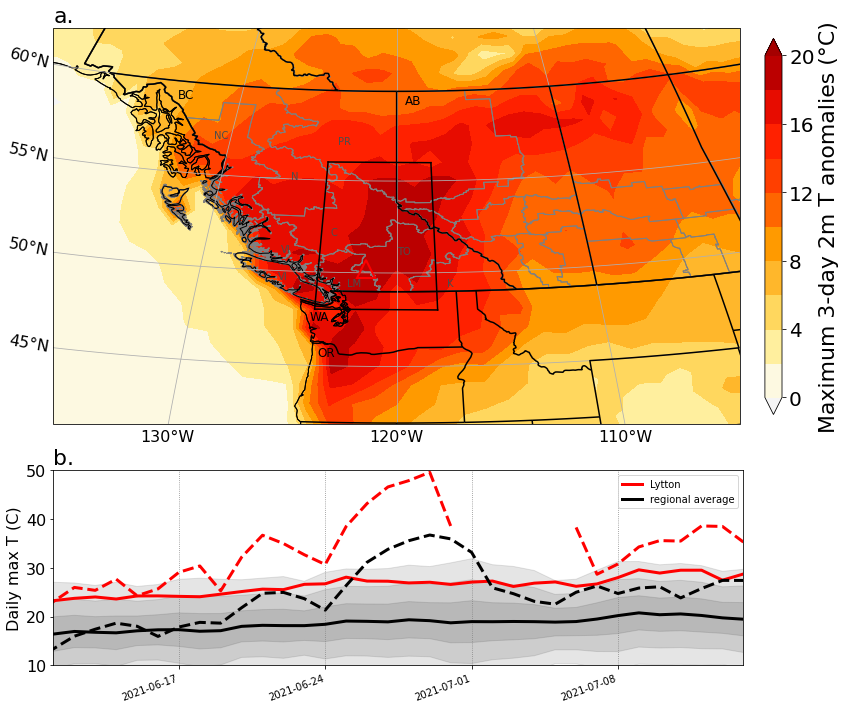

In [17]:
# 3-day maximum anomalies and timeseries of absolute temperatures
plt.rcParams.update({'font.size': 16})
fontsize=22
fontsize_small = 10
fontsize_CARs = 10
fontsize_PR = 12

lon_extent = [-135,-105]
lat_extent = [41,63]
latgrids=[40,45,50,55,60,65,70]
longrids=[-130,-120,-110]
central_lon = 240
central_lat = 39.0

# load station data
lat = station_maxt_diffs_array[1]
lon = station_maxt_diffs_array[0]
t_d = station_maxt_diffs_array[2]
#place_names = df4.VIRTUAL_STATION_NAME_F

lat_l = Lytton_maxt_diffs_array[1]
lon_l = Lytton_maxt_diffs_array[0] #+ 180
t_d_l = Lytton_maxt_diffs_array[2]
#place_names_l = df4_lytton.VIRTUAL_STATION_NAME_F

hw_year=2021

fig = plt.figure(figsize=(15,35))

# set up subplot grid
gridspec.GridSpec(95,40)

# 2021 heatwave large subplot
ax = plt.subplot2grid((95,40), (0,0), colspan=40, rowspan=20, projection=ccrs.Orthographic(
                        central_longitude=central_lon, central_latitude=central_lat))

ax = set_ax_overview(ax,longrids,latgrids,province=True)

#cb = plt.colorbar(diff_plot, shrink = 0.95, pad = 0.03,ax=ax)
#cb.set_label(label='Record T exceedance (\N{DEGREE SIGN}C)', size=fontsize)
#cb.ax.tick_params(labelsize=30)

diff_plot2 = diffs_max3day.mx2t.plot.contourf(ax=ax, transform=ccrs.PlateCarree(),
                                    cmap = cmap_reds,levels = np.arange(0,21,2),add_colorbar=False)
cb = plt.colorbar(diff_plot2, shrink = 0.95, pad = 0.03,ax=ax)
#te_di_l = ax.scatter(lon_l,lat_l,s = 400, c = t_d_l,
#                     norm=norm, transform=ccrs.PlateCarree(),linewidth = 3, facecolor=None,edgecolor='darkred', marker = '^')
ax.plot(lon_l,lat_l, marker="^", transform=ccrs.PlateCarree(),color='red',
                        markersize=18,markeredgewidth=2,markerfacecolor='None')


ax.add_feature(shape_feature,edgecolor='grey',facecolor='None')

#ax.add_feature(provinc_bodr, linestyle='-', linewidth=1.5, edgecolor="k", zorder=10)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linewidth=1.5)

cb.set_label(label='Maximum 3-day 2m T anomalies (\N{DEGREE SIGN}C)', size=fontsize)
cb.ax.tick_params(labelsize=20)

color_CARs = color=lighten_color('grey', 1.4)

ax.text(-126, 49.55, 'VI', transform=ccrs.PlateCarree(), fontsize=fontsize_CARs,color=color_CARs)
ax.text(-126, 51, 'VI', transform=ccrs.PlateCarree(), fontsize=fontsize_CARs,color=color_CARs)
ax.text(-122.5, 49.25, 'LM', transform=ccrs.PlateCarree(), fontsize=fontsize_CARs,color=color_CARs)
ax.text(-120, 51, 'TO', transform=ccrs.PlateCarree(), fontsize=fontsize_CARs,color=color_CARs)
ax.text(-117.5, 49.25, 'K', transform=ccrs.PlateCarree(), fontsize=fontsize_CARs,color=color_CARs)
ax.text(-123.5, 52, 'C', transform=ccrs.PlateCarree(), fontsize=fontsize_CARs,color=color_CARs)
ax.text(-131, 57, 'NC', transform=ccrs.PlateCarree(), fontsize=fontsize_CARs,color=color_CARs)
ax.text(-126, 55, 'N', transform=ccrs.PlateCarree(), fontsize=fontsize_CARs,color=color_CARs)
ax.text(-123.5, 57, 'PR', transform=ccrs.PlateCarree(), fontsize=fontsize_CARs,color=color_CARs)

plt.plot([lon1[hw_year],lon1[hw_year]],[lat2[hw_year],lat1[hw_year]],color='k', transform=ccrs.PlateCarree())
plt.plot([lon2[hw_year],lon2[hw_year]],[lat2[hw_year],lat1[hw_year]],color='k', transform=ccrs.PlateCarree())
plt.plot([lon1[hw_year],lon2[hw_year]],[lat2[hw_year],lat2[hw_year]],color='k', transform=ccrs.PlateCarree())
plt.plot([lon1[hw_year],lon2[hw_year]],[lat1[hw_year],lat1[hw_year]],color='k', transform=ccrs.PlateCarree())

ax.text(-134, 59.0, 'BC', transform=ccrs.PlateCarree(), fontsize=fontsize_PR)
ax.text(-119.5, 59.25, 'AB', transform=ccrs.PlateCarree(), fontsize=fontsize_PR)
ax.text(-124.2, 47.4, 'WA', transform=ccrs.PlateCarree(), fontsize=fontsize_PR)
ax.text(-123.7, 45.5, 'OR', transform=ccrs.PlateCarree(), fontsize=fontsize_PR)

ax.set_title('a.',loc='left', fontsize=fontsize)
ax.set_title('',loc='center', fontsize=fontsize)


### Plot line graphs

ax = plt.subplot2grid((95,40), (22,0), colspan=33, rowspan=10)

lytton_t_hw.sel(time=slice(str(hw_year) + '-06-01', str(hw_year) + '-08-31')).plot(
                color = 'r',linewidth=3,linestyle='--')

lytton_t_1980_2020_clim_mean.sel(time=slice(str(hw_year) + '-06-01', str(hw_year) + '-08-31')).plot(
                color = 'r',linewidth=3,linestyle='-',label='Lytton')


toplot_clim = ERA5_Tmax_reg_ts_avg_1980_2020_clim[hw_year].sel(time=slice(
                                                str(hw_year) + '-06-01', str(hw_year) + '-08-31')) - 273.15
toplot_std = ERA5_Tmax_reg_ts_avg_1980_2020_std[hw_year].sel(time=slice(
                                                str(hw_year) + '-06-01', str(hw_year) + '-08-31'))
toplot_clim.plot(color = 'k',linewidth=3,label='regional average')

(ERA5_Tmax_reg_ts_avg[hw_year].mx2t - 273.15).sel(time=slice ('2021-06-07', '2021-07-14')).plot(
                                    color = 'k', linestyle = '--',linewidth=3)
plt.fill_between(toplot_clim['time'].values, toplot_clim.values + toplot_std.values, 
                                             toplot_clim.values - toplot_std.values,
                                             color = 'k', alpha = 0.1)
plt.fill_between(toplot_clim['time'].values, toplot_clim.values + 2*toplot_std.values, 
                                             toplot_clim.values - 2*toplot_std.values, 
                                             color = 'k', alpha = 0.1)
plt.fill_between(toplot_clim['time'].values, toplot_clim.values + 3*toplot_std.values, 
                                             toplot_clim.values - 3*toplot_std.values, 
                                             color = 'k', alpha = 0.1)


ax.set_title('b.',loc='left', fontsize=fontsize)

plt.legend(fontsize=fontsize_small)
plt.grid(axis='x',color='grey',linestyle=':')
plt.xlabel('')
plt.ylabel('Daily max T (C)')
plt.xticks(fontsize= fontsize_small,rotation = 20)
xtick_values = [ERA5_Tmax_reg_ts_avg[hw_year].time.isel(time=16).values,
                ERA5_Tmax_reg_ts_avg[hw_year].time.isel(time=23).values,
                ERA5_Tmax_reg_ts_avg[hw_year].time.isel(time=30).values,
                ERA5_Tmax_reg_ts_avg[hw_year].time.isel(time=37).values,
                ERA5_Tmax_reg_ts_avg[hw_year].time.isel(time=44).values]               
ax.set_xticks(xtick_values)
plt.xlim('2021-06-11','2021-07-14')
plt.ylim(10,50)


#fig.tight_layout()
fig.subplots_adjust(hspace=0.4)
plt.show()

/home/rwhite/rwhite/.conda/envs/python3ext2/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1508: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/home/rwhite/rwhite/.conda/envs/python3ext2/lib/python3.7/site-packages/ipykernel_launcher.py:116: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations


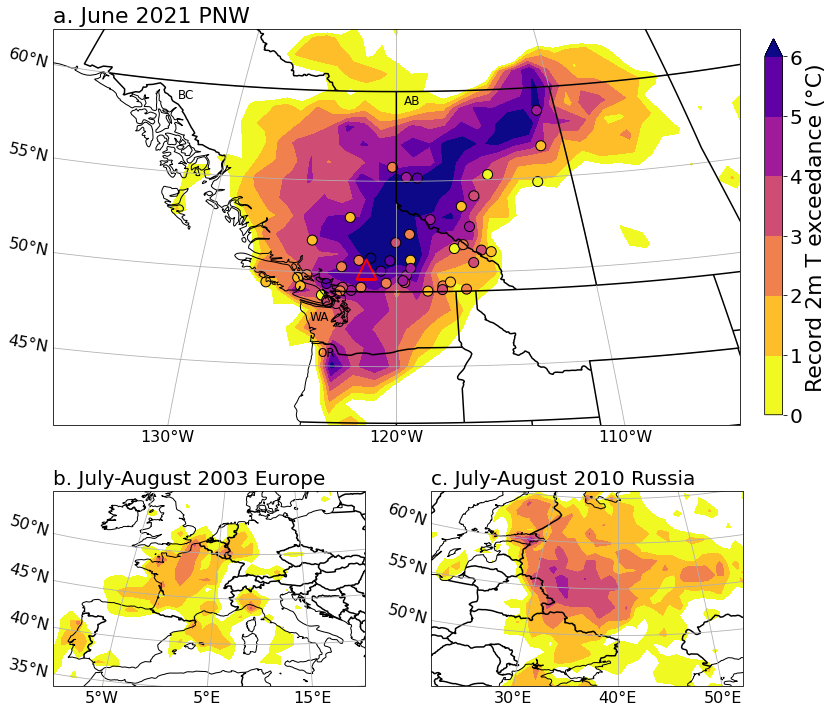

In [26]:
# Record exceedance
plt.rcParams.update({'font.size': 16})
fontsize=22
fontsize_small = 10
fontsize_CARs = 10
fontsize_PR = 12

# load station data
lat = station_maxt_diffs_array[1]
lon = station_maxt_diffs_array[0]
t_d = station_maxt_diffs_array[2]

hw_year=2021

fig = plt.figure(figsize=(15,35))

# set up subplot grid
gridspec.GridSpec(95,40)

hw_year = 2021
diff = ERA5_TXx_hw[hw_year] - ERA5_TXx_hist[hw_year]

lon_extent = [-135,-105]
lat_extent = [41,63]
latgrids=[40,45,50,55,60,65,70]
longrids=[-130,-120,-110]
central_lon = 240
central_lat = 39.0

ax = plt.subplot2grid((95,40), (35,0), colspan=40, rowspan=20, projection=ccrs.Orthographic(
                        central_longitude=central_lon, central_latitude=central_lat))

ax = set_ax_overview(ax,longrids,latgrids,province=True)

cmap_pl = matplotlib.cm.get_cmap("plasma_r", 30)
bounds = np.linspace(0, 6, 7)

norm = matplotlib.colors.BoundaryNorm(bounds, cmap_pl.N, extend = 'max')

diff_plot = plt.contourf(diff.mx2t.longitude, diff.mx2t.latitude, diff.mx2t.values, transform=ccrs.PlateCarree(),
                                    cmap = cmap_pl, levels = np.linspace(0,6,7),norm=norm,
                                    add_colorbar=False,extend='max')

cb = plt.colorbar(diff_plot, shrink = 0.95, pad = 0.03,ax=ax)
cb.set_label(label='Record 2m T exceedance (\N{DEGREE SIGN}C)', size=fontsize)
cb.ax.tick_params(labelsize=20)

# Plot stations
#cmap_pl = matplotlib.cm.get_cmap("plasma_r", 16)

te_di = ax.scatter(lon,lat,s = 100, c = t_d, cmap=cmap_pl,
                    norm=norm, edgecolor='black', transform=ccrs.PlateCarree())
te_di_l = ax.scatter(lon_l,lat_l,s = 400, c = t_d_l, cmap=cmap_pl,
                     norm=norm, transform=ccrs.PlateCarree(),linewidth = 2, edgecolor='red', marker = '^')

ax.text(-134, 59.0, 'BC', transform=ccrs.PlateCarree(), fontsize=fontsize_PR)
ax.text(-119.5, 59.25, 'AB', transform=ccrs.PlateCarree(), fontsize=fontsize_PR)
ax.text(-124.2, 47.4, 'WA', transform=ccrs.PlateCarree(), fontsize=fontsize_PR)
ax.text(-123.7, 45.5, 'OR', transform=ccrs.PlateCarree(), fontsize=fontsize_PR)

ax.set_title('a. June 2021 PNW',loc='left', fontsize=fontsize)

hw_year = 2003

diff = ERA5_TXx_hw[hw_year] - ERA5_TXx_hist[hw_year]

lon_extent = [-10,20]
lat_extent = [35,56]
central_lon = 10
central_lat = 39.0
latgrids=[35,40,45,50]
longrids=[-5,5,15]

plt.rcParams.update({'font.size': 16})
fontsize=20
fontsize_small = 14

ax = plt.subplot2grid((95,40), (58,0), colspan=15, rowspan=10, projection=ccrs.Orthographic(
                        central_longitude=central_lon, central_latitude=central_lat))

ax = set_ax_overview(ax,longrids,latgrids)

wrap_diff, wrap_lon = add_cyclic_point(diff.mx2t, coord=ERA5_TXx_hw[hw_year].coords['longitude'], 
                                       axis=ERA5_TXx_hw[hw_year].mx2t.dims.index('longitude'))

diff_plot = plt.contourf(wrap_lon,ERA5_TXx_hw[hw_year].latitude,wrap_diff,
                         transform=ccrs.PlateCarree(),cmap = cmap_pl,norm=norm,levels = np.linspace(0,6,7),
                         add_colorbar=False,extend='max')

ax.set_title('b. July-August 2003 Europe',loc='left', fontsize=fontsize)

# 2003 heatwave

hw_year = 2010

diff = ERA5_TXx_hw[hw_year] - ERA5_TXx_hist[hw_year]

lon_extent = [22,52]
lat_extent = [44,65]
latgrids=[50,55,60,65]
longrids=[30,40,50]
central_lon = 40
central_lat = 45.0
plt.rcParams.update({'font.size': 16})
fontsize=20
fontsize_small = 14

ax = plt.subplot2grid((95,40), (58,18), colspan=15, rowspan=10, projection=ccrs.Orthographic(
                        central_longitude=central_lon, central_latitude=central_lat))

ax = set_ax_overview(ax,longrids,latgrids)

wrap_diff, wrap_lon = add_cyclic_point(diff.mx2t, coord=ERA5_TXx_hw[hw_year].coords['longitude'], 
                                       axis=ERA5_TXx_hw[hw_year].mx2t.dims.index('longitude'))

diff_plot = plt.contourf(wrap_lon,ERA5_TXx_hw[hw_year].latitude,wrap_diff,
                         transform=ccrs.PlateCarree(),cmap = cmap_pl,norm=norm,levels = np.linspace(0,6,7),
                         add_colorbar=False,extend='max')

ax.set_title('c. July-August 2010 Russia',loc='left', fontsize=fontsize)
fig.tight_layout()
fig.subplots_adjust(hspace=0.4)
plt.show()

### Synoptic plot

In [10]:
# Set up parameters and functions for drawing maps
resol = '50m'
provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale=resol, facecolor='none', edgecolor='k')

lon_extent = [-230,-115]
lat_extent = [30,45]


/home/rwhite/rwhite/.conda/envs/python3ext2/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1841: UserWarning: Some vectors at source domain corners may not have been transformed correctly
  u, v = self.projection.transform_vectors(t, x, y, u, v)
/home/rwhite/rwhite/.conda/envs/python3ext2/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1841: UserWarning: Some vectors at source domain corners may not have been transformed correctly
  u, v = self.projection.transform_vectors(t, x, y, u, v)
/home/rwhite/rwhite/.conda/envs/python3ext2/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1841: UserWarning: Some vectors at source domain corners may not have been transformed correctly
  u, v = self.projection.transform_vectors(t, x, y, u, v)
/home/rwhite/rwhite/.conda/envs/python3ext2/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1841: UserWarning: Some vectors at source domain corners may not have been transformed correctly
  u, v = self.projection.transform_vectors(t, x, y, u, v)


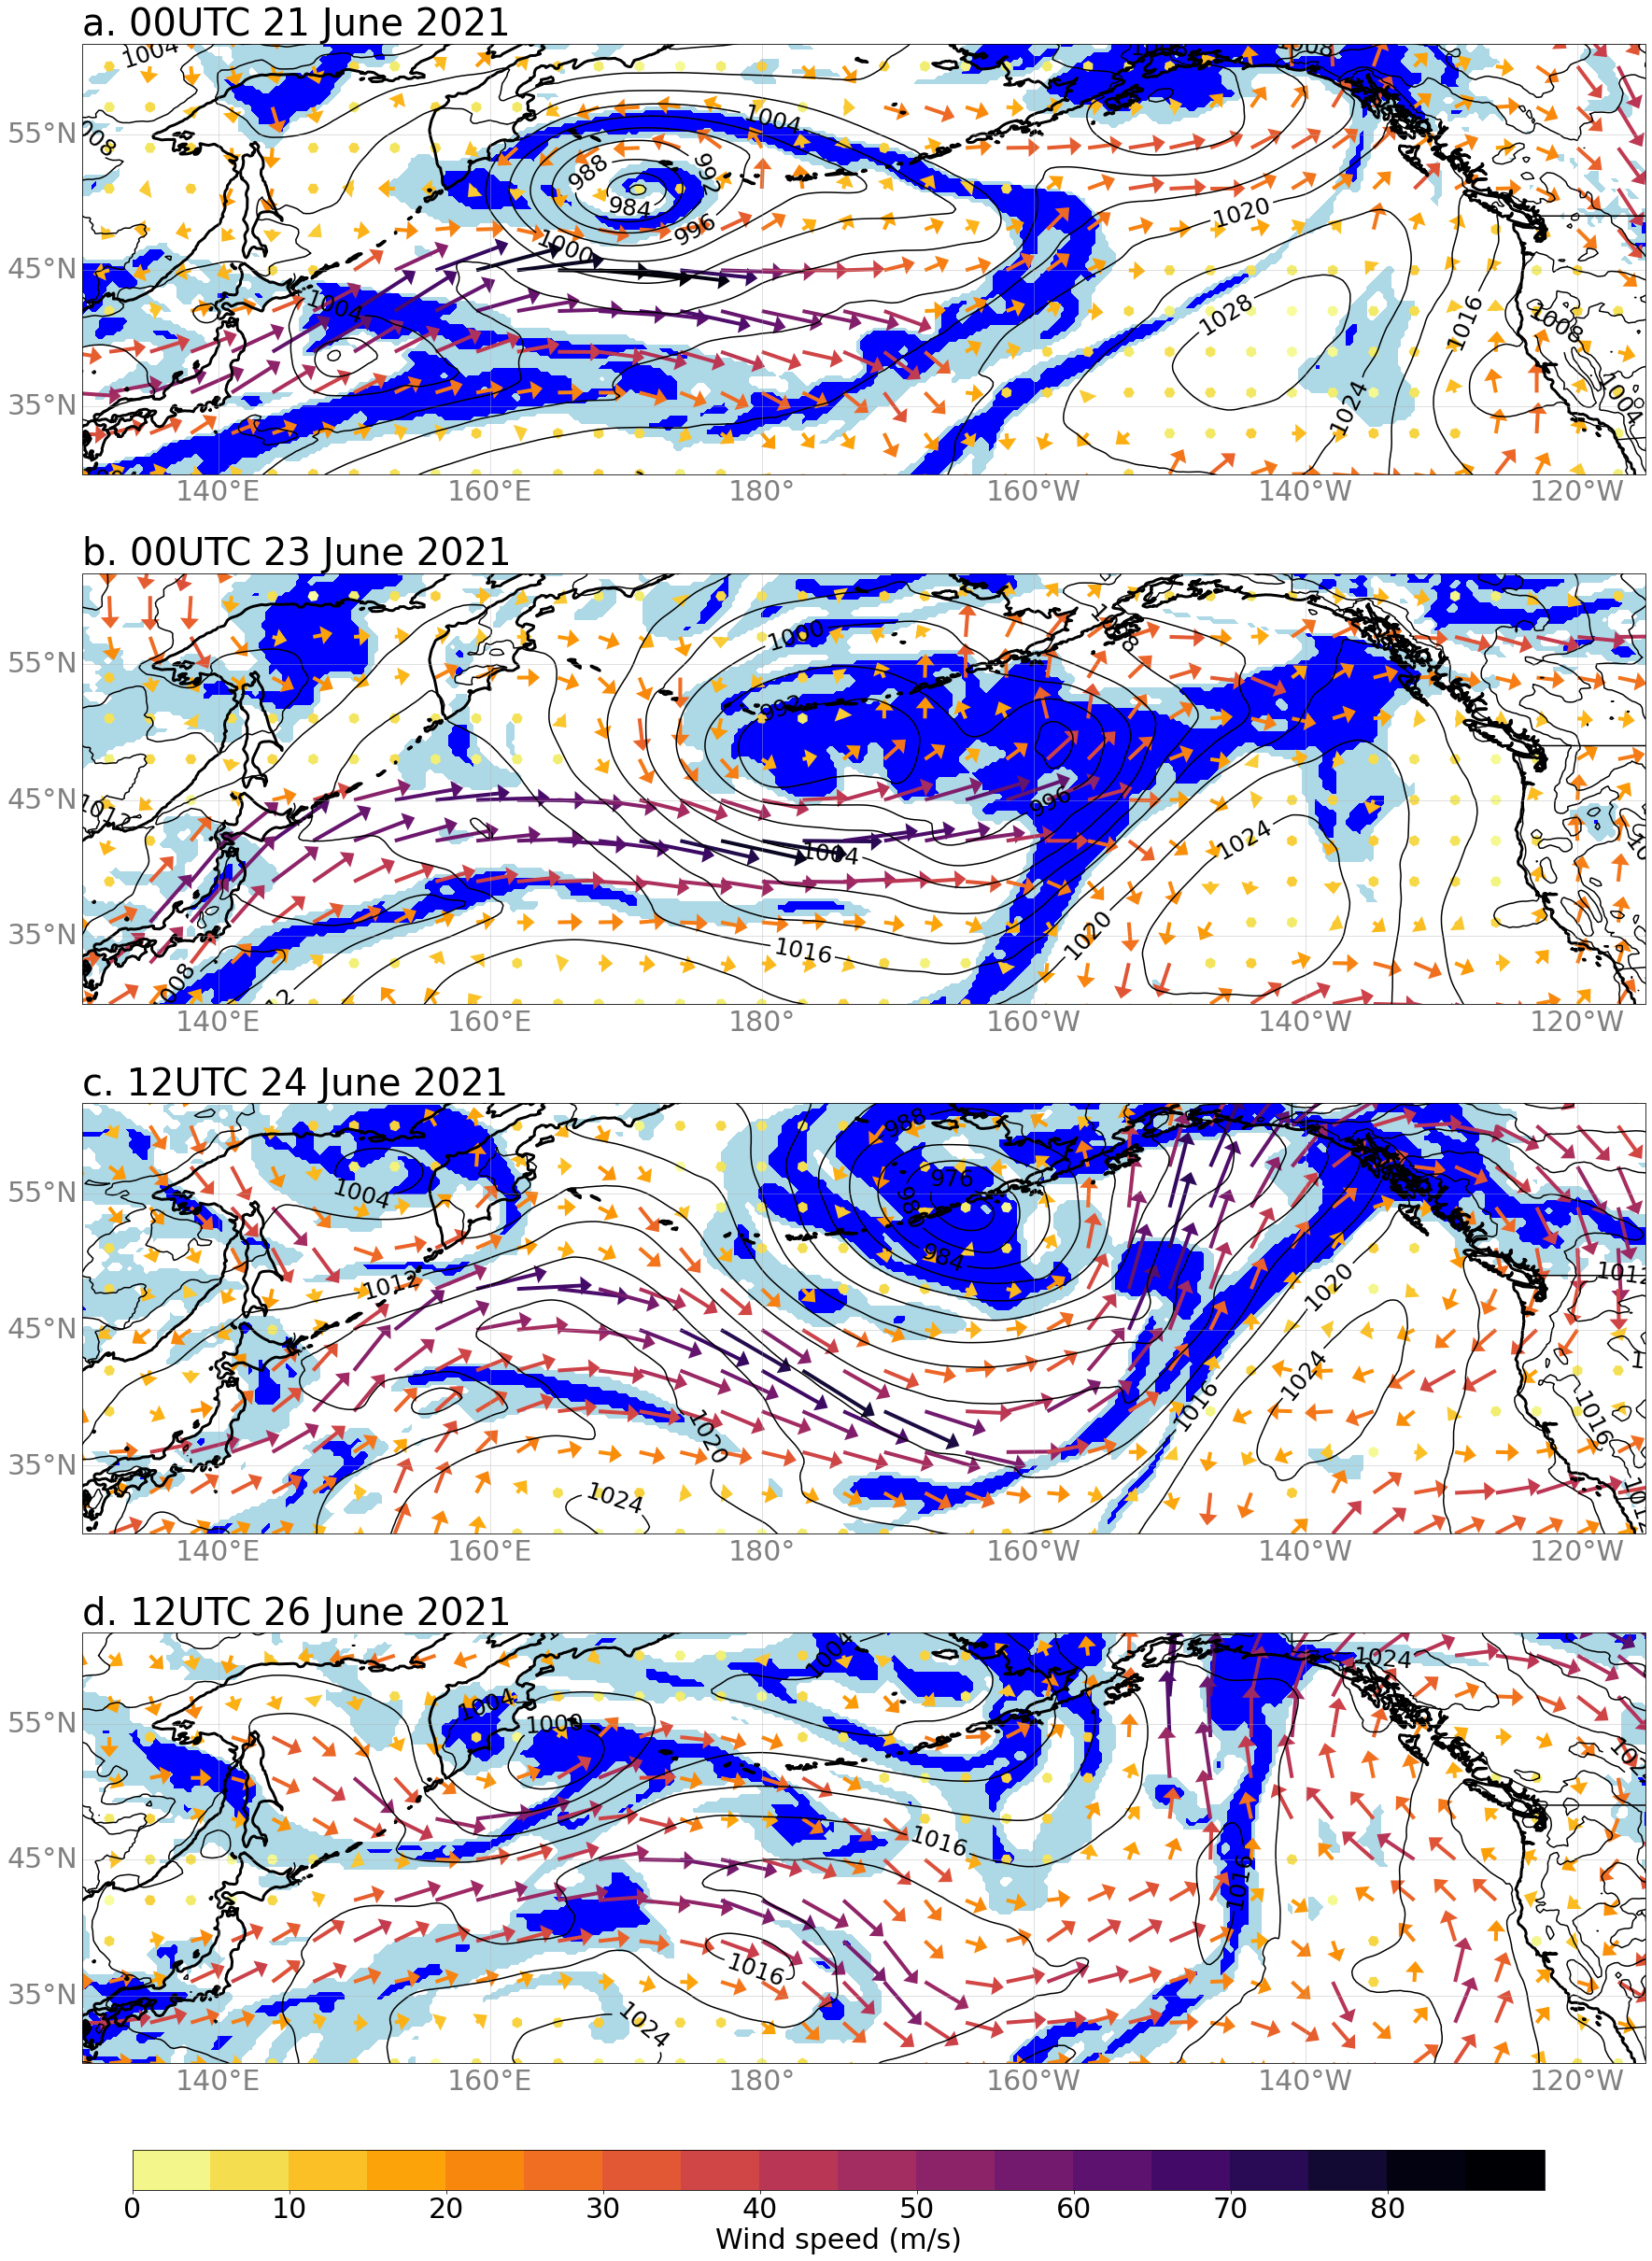

In [21]:
# Plot figure
fig = plt.figure(figsize=(30,40))

n=1

# 21 June
ax = set_ax_synoptic(n); n+=1
timesel = '2021-06-21T00:00:00.000000000'
ax,quplot = plot_rh_mslp_u_v(ax,timesel)

ax.set_title('a. 00UTC 21 June 2021', loc = 'left', fontsize=40)
ax.set_title('', fontsize=30,loc='center')

# 23 June
ax = set_ax_synoptic(n); n+=1
timesel = '2021-06-23T00:00:00.000000000'
ax,quplot = plot_rh_mslp_u_v(ax,timesel)

ax.set_title('b. 00UTC 23 June 2021', loc = 'left', fontsize=40)
ax.set_title('', fontsize=30,loc='center')

# 24 June
ax = set_ax_synoptic(n); n+=1
timesel = '2021-06-24T12:00:00.000000000'
ax,quplot = plot_rh_mslp_u_v(ax,timesel)

ax.set_title('c. 12UTC 24 June 2021', loc = 'left', fontsize=40)
ax.set_title('', fontsize=30,loc='center')

# 26 June
ax = set_ax_synoptic(n); n+=1
timesel = '2021-06-26T12:00:00.000000000'
ax,quplot = plot_rh_mslp_u_v(ax,timesel)

ax.set_title('d. 12UTC 26 June 2021', loc = 'left', fontsize=40)
ax.set_title('', fontsize=30,loc='center')

cbar_ax = fig.add_axes([0.15, 0.08, 0.7, 0.015])
cb = fig.colorbar(quplot, cax=cbar_ax, shrink = 0.8,pad = 0.03,
                  orientation='horizontal',values = np.arange(2.5,92.5,5))
plt.clim(0,85)
cb.set_label(label='Wind speed (m/s)', size=30)
cb.ax.tick_params(labelsize=30)

fig.subplots_adjust(hspace=0.2)
plt.show()